In [358]:
import pandas as pd
import os
import env
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pydataset import data
from acquire import get_telco_data
from prepare import prep_telco
import warnings
warnings.filterwarnings('ignore')
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import scipy.stats as stats
from scipy.stats import mannwhitneyu

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

from sklearn.metrics import confusion_matrix
import graphviz
from graphviz import Graph
from sklearn import tree
import numpy
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

## Acquire the data

We will use functions to obtain our data.

**Get connection to SQL**

In [359]:
def get_connection(db, user=env.user, host=env.host, password=env.password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

**Get telco data**

In [360]:
def get_telco_data():
    filename = "telco_churn.csv"
    sql = '''SELECT *
        FROM customers 
        JOIN contract_types
        ON contract_types.contract_type_id = customers.contract_type_id
        JOIN internet_service_types
        ON internet_service_types.internet_service_type_id = customers.internet_service_type_id
        JOIN payment_types 
        ON payment_types.payment_type_id = customers.payment_type_id'''
    if os.path.isfile(filename):
        return pd.read_csv(filename)
    else:
        df = pd.read_sql(sql, get_connection('telco_churn'))
        return df

We will create a dictionary of our raw data for our `README.md` file.

In [322]:
details = {
    'Target' : ['churn'],
    'Dataype' : [df.dtypes['churn']],
    'Definition' : ['Whether or not a customer has churned'],
}

In [323]:
dictionary = {
    'Feature' : [
                'customer_id', 
                 'gender', 
                 'senior_citizen', 
                 'partner', 
                 'dependents', 
                 'tenure', 
                 'phone_service', 
                 'multiple_lines', 
                 'internet_service_type_id', 
                'online_security', 
                'online_backup', 
                'device_protection',
                'tech_support', 
                'streaming_tv', 
                'streaming_movies', 
                'contract_type_id', 
                'paperless_billing', 
                'payment_type_id', 
                'monthly_charges',
                'total_charges',
                'churn',
                'contract_type',
                'internet_service_type',
                'payment_type',
                ],
    'Dataype' : [
                df.dtypes['customer_id'], 
                 df.dtypes['gender'], 
                 df.dtypes['senior_citizen'],
                df.dtypes['partner'],
                 df.dtypes['dependents'], 
                 df.dtypes['tenure'], 
                 df.dtypes['phone_service'], 
                df.dtypes['multiple_lines'],
                 df.dtypes['internet_service_type_id'], 
                df.dtypes['online_security'], 
                df.dtypes['online_backup'], 
                df.dtypes['device_protection'],
                df.dtypes['tech_support'], 
                df.dtypes['streaming_tv'], 
                df.dtypes['streaming_movies'],
                df.dtypes['contract_type_id'], 
                df.dtypes['paperless_billing'], 
                df.dtypes['payment_type_id'], 
                df.dtypes['monthly_charges'],
                df.dtypes['total_charges'],
                df.dtypes['churn'],
                df.dtypes['contract_type'],
                df.dtypes['internet_service_type'],
                df.dtypes['payment_type'],
                ],
    'Definition' : ['Identification number for customer', 
                    'Customer gender, male or female', 
                    'Yes or no, is the customer a senior citizen', 
                    'Yes or no, does the customer customer has a parter', 
                    'Number of dependents a customer has', 
                    'Number of days a customer has been with the company', 
                    'Type of phone service plan a customer has', 
                    'Yes or no, does the customer have multiple lines', 
                    '1 for DSL, 2 for Fiber Optic, 3 for None', 
                    'Yes, no, or no internet service',
                    'Yes, no, or no internet service', 
                    'Yes, no, or no internet service',
                    'Yes, no, or no internet service', 
                    'Yes, no, or no internet service',
                    'Yes, no, or no internet service',
                    '1 for month-to-month, 2 for year, and 3 for two-year contract', 
                    'Yes or no, whether or not the customer uses paperless billing', 
                    '1 for electronic check, 2 for mailed check, 3 for automatic bank transfer, 4 for automatic credit card payment',
                    'Monthly charges the customer pays',
                    'Total charges the customer has paid',
                    'Yes or no, whether or not the customer has churned',
                    'Month-to-month, year, or two-year contract',
                    'DSL, Fiber Optic, or None',
                    'Electronic check, mailed check, automatic bank transfer, or automatic credit card payment',
                    ],
}

In [324]:
dict_churn = pd.DataFrame(details)

In [325]:
data_dictionary = pd.DataFrame(dictionary)

In [326]:
print(dict_churn.to_markdown(index=False))

| Target   | Dataype   | Definition                            |
|:---------|:----------|:--------------------------------------|
| churn    | object    | Whether or not a customer has churned |


In [327]:
print(data_dictionary.to_markdown(index=False))

| Feature                  | Dataype   | Definition                                                                                                     |
|:-------------------------|:----------|:---------------------------------------------------------------------------------------------------------------|
| customer_id              | object    | Identification number for customer                                                                             |
| gender                   | object    | Customer gender, male or female                                                                                |
| senior_citizen           | int64     | Yes or no, is the customer a senior citizen                                                                    |
| partner                  | object    | Yes or no, does the customer customer has a parter                                                             |
| dependents               | object    | Number of dependents a customer has

Now we can begin to explore the data. First let's look at the dataframe itself.

In [328]:
df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,has_churned
0,0016-QLJIS,Female,0,Yes,Yes,65,Yes,Yes,1,Yes,...,3,Yes,2,90.45,5957.90,No,Two year,DSL,Mailed check,0
1,0017-DINOC,Male,0,No,No,54,No,No phone service,1,Yes,...,3,No,4,45.20,2460.55,No,Two year,DSL,Credit card (automatic),0
2,0019-GFNTW,Female,0,No,No,56,No,No phone service,1,Yes,...,3,No,3,45.05,2560.10,No,Two year,DSL,Bank transfer (automatic),0
3,0056-EPFBG,Male,0,Yes,Yes,20,No,No phone service,1,Yes,...,3,Yes,4,39.40,825.40,No,Two year,DSL,Credit card (automatic),0
4,0078-XZMHT,Male,0,Yes,No,72,Yes,Yes,1,No,...,3,Yes,3,85.15,6316.20,No,Two year,DSL,Bank transfer (automatic),0


We will complete an inital data summarization using `info()`, `describe()`, and `value_counts()`.

In [329]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               7043 non-null   object 
 1   gender                    7043 non-null   object 
 2   senior_citizen            7043 non-null   int64  
 3   partner                   7043 non-null   object 
 4   dependents                7043 non-null   object 
 5   tenure                    7043 non-null   int64  
 6   phone_service             7043 non-null   object 
 7   multiple_lines            7043 non-null   object 
 8   internet_service_type_id  7043 non-null   int64  
 9   online_security           7043 non-null   object 
 10  online_backup             7043 non-null   object 
 11  device_protection         7043 non-null   object 
 12  tech_support              7043 non-null   object 
 13  streaming_tv              7043 non-null   object 
 14  streamin

In [330]:
df.describe()

,senior_citizen,tenure,internet_service_type_id,contract_type_id,payment_type_id,monthly_charges,total_charges,has_churned
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,1.872923,1.690473,2.315633,64.761692,2279.734304,0.265370
std,0.368612,24.559481,0.737796,0.833755,1.148907,30.090047,2266.794470,0.441561
min,0.000000,0.000000,1.000000,1.000000,1.000000,18.250000,0.000000,0.000000
25%,0.000000,9.000000,1.000000,1.000000,1.000000,35.500000,398.550000,0.000000
50%,0.000000,29.000000,2.000000,1.000000,2.000000,70.350000,1394.550000,0.000000
75%,0.000000,55.000000,2.000000,2.000000,3.000000,89.850000,3786.600000,1.000000
max,1.000000,72.000000,3.000000,3.000000,4.000000,118.750000,8684.800000,1.000000


The `value_counts()` function will not work if we have duplicate columns, so we have to get rid of duplicate columns.

In [331]:
df = df.loc[:,~df.columns.duplicated()]

Now we can run a loop to determine the `value_counts()` for each column.

In [332]:
for c in df.columns:
    print ("---- %s ---" % c)
    print (df[c].value_counts())

---- customer_id ---
9415-ZNBSX    1
2038-OEQZH    1
1587-FKLZB    1
5186-EJEGL    1
8050-WYBND    1
             ..
6522-OIQSX    1
5124-EOGYE    1
6595-COKXZ    1
1725-IQNIY    1
7343-EOBEU    1
Name: customer_id, Length: 7043, dtype: int64
---- gender ---
Male      3555
Female    3488
Name: gender, dtype: int64
---- senior_citizen ---
0    5901
1    1142
Name: senior_citizen, dtype: int64
---- partner ---
No     3641
Yes    3402
Name: partner, dtype: int64
---- dependents ---
No     4933
Yes    2110
Name: dependents, dtype: int64
---- tenure ---
1     613
72    362
2     238
3     200
4     176
71    170
5     133
7     131
8     123
70    119
9     119
12    117
10    116
6     110
13    109
68    100
11     99
15     99
67     98
18     97
69     95
24     94
22     90
66     89
35     88
17     87
23     85
56     80
52     80
64     80
16     80
26     79
25     79
60     76
61     76
65     76
14     76
46     74
19     73
27     72
29     72
30     72
63     72
20     71
62   

## Prepare the data

First we will make afunction that will split our data into `train`, `validate`, and `test`.

In [361]:
def split_data(df):
    '''
    take in a DataFrame and return train, validate, and test DataFrames; stratify on churn.
    return train, validate, test DataFrames.
    '''
    
    # splits df into train_validate and test using train_test_split() stratifying on churn to get an even mix of each churn, yes or no
    train_validate, test = train_test_split(df, test_size=.2, random_state=123, stratify=df.has_churned)
    
    # splits train_validate into train and validate using train_test_split() stratifying on churn to get an even mix of each churn
    train, validate = train_test_split(train_validate, 
                                       test_size=.3, 
                                       random_state=123, 
                                       stratify=train_validate.has_churned)
    return train, validate, test

In [362]:
def prep_telco(df):
    ## First we will get rid of duplicate columns
    df = df.loc[:,~df.columns.duplicated()]
    
    ##Add a numeric columns for churned or didn't churn
    df['has_churned'] = df['churn'].replace({'No' : 0, 'Yes': 1})
    
    ##Add a numerical column for paperless billing
    df['paperless_billing_numeric'] = df['paperless_billing'].replace({'No' : 0, 'Yes': 1})
    
    ## Now we will substitute the object values for dummy values that are easier to process. 
    dummy_df = pd.get_dummies(df[['partner', 'dependents', 'gender', 'phone_service', 'multiple_lines', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies']], drop_first=True)
    
    ##Concatenate our dummy values to our main Dataframe. 
    df = pd.concat([df, dummy_df], axis=1)
    
    ## Drop the redundant columns.
    df = df.drop(columns = ['customer_id', 'gender', 'partner', 'dependents', 'phone_service', 'multiple_lines', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'contract_type', 'internet_service_type', 'payment_type', 'churn', 'paperless_billing'])
    
    ##Our column total_charges has some empty string values, so we will replace those values with a 0
    
    df["total_charges"] = df.total_charges.replace(" ", "0")
    
    ##Now we will convert the numbers in our total_charges and monthly_charges columns to floats. 
    df['total_charges'] = df.total_charges.astype(float)
    
    df['monthly_charges'] = df.monthly_charges.astype(float)
    
    ## Now we can split our data into train, validate, and test
    
     # split data into train, validate, test dfs
    train, validate, test = split_data(df)
    
    return train, validate, test

In [363]:
train, test, validate = prep_telco(df)

In [336]:
train.columns

Index(['senior_citizen', 'tenure', 'internet_service_type_id',
       'contract_type_id', 'payment_type_id', 'monthly_charges',
       'total_charges', 'has_churned', 'partner_Yes', 'dependents_Yes',
       'gender_Male', 'phone_service_Yes', 'multiple_lines_No phone service',
       'multiple_lines_Yes', 'online_security_No internet service',
       'online_security_Yes', 'online_backup_No internet service',
       'online_backup_Yes', 'device_protection_No internet service',
       'device_protection_Yes', 'tech_support_No internet service',
       'tech_support_Yes', 'streaming_tv_No internet service',
       'streaming_tv_Yes', 'streaming_movies_No internet service',
       'streaming_movies_Yes'],
      dtype='object')

## Initial Hypothesis Testing

For all of the following hypotheses we will set $\alpha = 0.05 $. 

### Hypothesis 1

**Formulate hypotheses**

$H_0$: There is no difference in the churn rate for customers on month-to-month contracts and the churn rate for customers on either year or two-year contracts. 

$H_a$: There is a significant difference in the churn rate for customers on month-to-month contracts and the churn rate for customers on either year or two-yera contracts. 

**Get data**

In [337]:
month_to_month_customers = train[train.contract_type_id == 1]

In [338]:
year_and_two_year_customers = train[train.contract_type_id != 1]

**Compute p value and test statistic**

In [339]:
tstat, p = stats.ttest_ind(month_to_month_customers.has_churned, year_and_two_year_customers.has_churned)

In [340]:
tstat

28.150653344431294

In [341]:
p

4.950197678770975e-159

**Make a conclusion based on our data**

Since our p value is less than 0.05, we can conclude that there is a significant difference between the month-to-month customer churn rate and the year-to-year and two-year customer churn rates. 

**Chart indicating correlation**

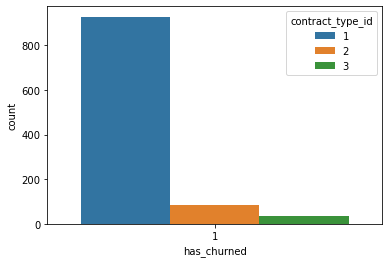

In [342]:
churn_counts_by_contract = sns.countplot(x='has_churned', data=train[train.has_churned == 1], hue = "contract_type_id")

### Hypothesis 2

**Formulate hypotheses**

$H_0$: There is no correlation between customer churn rate and monthly charges. 

$H_a$: There is a correlation between customer churn rate and monthly charges.

**Get data**

In [343]:
churn_rate = train.has_churned
monthly_charges = train.monthly_charges

**Compute p value and correlation**

In [344]:
corr, p = stats.pearsonr(churn_rate, monthly_charges)
corr, p

(0.18903970957264357, 4.816687112552436e-33)

**Make conclusion based on our data**

Our p-value is less than 0.05. We reject the null hypothesis and conclude that churn rate and monthly charges are correlated.

**Chart indicating correlation**

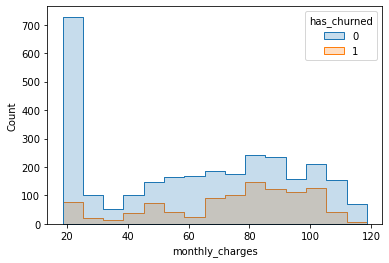

In [345]:
churn_by_monthly_charges = sns.histplot(
    x=train.monthly_charges, hue=train.has_churned, element = 'step'
)

We will now use the Mann Whitney Test to test if the churn group has a different mean than the non churn group for certain values. 

**We need the following data for our next hypotheses**

In [346]:
train_has_churned = train[train.has_churned == 1]

In [347]:
train_no_churn = train[train.has_churned == 0]

### Hypothesis 3

**Formulate hypotheses**

$H_0$: There is no significant difference between the mean tenure for customers who didn't churn and customers who did churn. 

$H_a$: There is a significant difference between the mean tenure for customers who churned and customers who did churn. 

**Compute statistic and p value**

In [348]:
stats.mannwhitneyu(train_has_churned['tenure'], train_no_churn['tenure'], use_continuity=True)

MannwhitneyuResult(statistic=787745.5, pvalue=5.978994288055496e-118)

Because our p value is less than 0.05, we conclude that the mean tenure for customers who churned is signficantly different from the mean tenure for customers who didn't churn. 

**Graph**

<AxesSubplot:xlabel='tenure', ylabel='Count'>

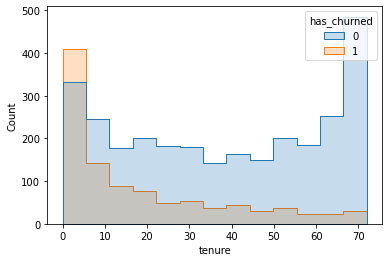

In [349]:
sns.histplot(x=train.tenure, hue=train.has_churned, element = 'step')

### Hypothesis 4

**Formulate hypotheses**

$H_0$: There is no significant difference in mean monthly charges for customers who have churned and customers who have not churned. 

$H_a$: There is a significant difference in mean monthly charges for customers who have churned and customers who have not churned.

**Compute statistic and p value**

In [303]:
stats.mannwhitneyu(train_has_churned['monthly_charges'], train_no_churn['monthly_charges'], use_continuity=True)

MannwhitneyuResult(statistic=1160715.0, pvalue=1.4455529063493655e-29)

Because our p value is less than 0.05, we reject the null hypothesis and conclude that mean monthly charges for customers who have churned are significantly different from mean monthly charges for customers who have not churned.

**Graph**

<AxesSubplot:xlabel='monthly_charges', ylabel='Count'>

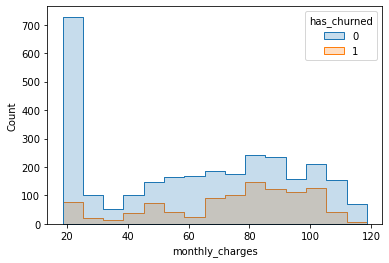

In [304]:
sns.histplot(x=train.monthly_charges, hue = train.has_churned, element = 'step')

### Hypothesis 5

**Formulate hypotheses**

$H_0$: There is no significant difference in average contract type for customers who churn and customers who do not churn. 

$H_a$: There is a significant difference in average contract type for customers who churn and customers who do not churn.

**Compute statistic and p value**

In [305]:
stats.mannwhitneyu(train_has_churned['contract_type_id'], train_no_churn['contract_type_id'], use_continuity=True)

MannwhitneyuResult(statistic=789116.0, pvalue=3.760387895572131e-144)

Because our p-value is less than 0.05, we reject the null hypothesis and conclude that there is a significant difference in mean contract type for customers who churn and customers who don't churn. 

**Graph**

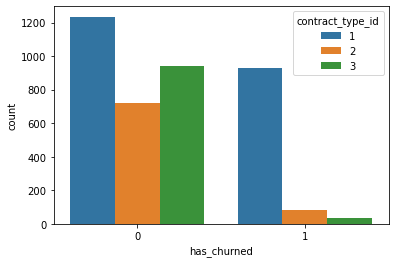

In [306]:
churn_counts_by_contract = sns.countplot(x='has_churned', data=train, hue = "contract_type_id")

### Hypothesis 6

**Formulate hypotheses**

$H_0$: There is no significant difference in mean payment type id for customers who churn and customers who don't churn.

$H_a$: There is a significant difference in mean payment type id for customers who churn and customers who don't churn.

**Calculate statistic and p value**

In [307]:
stats.mannwhitneyu(train_has_churned['payment_type_id'], train_no_churn['payment_type_id'], use_continuity=True)

MannwhitneyuResult(statistic=1010432.5, pvalue=4.42203203035722e-62)

Because or p-value is less than 0.05, we reject the null hypothesis and conclude that there is a significant different in mean payment type id for customers who churned and customers who did not churn. 

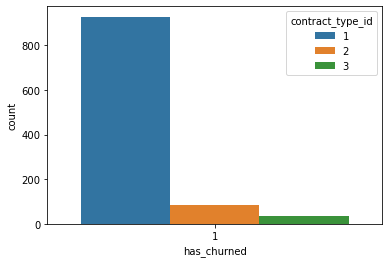

In [308]:
churn_rates_counts_by_contract = sns.countplot(x='has_churned', data=train[train.has_churned == 1], hue = "contract_type_id")

### Hypothesis 7

**Formulate hypotheses**

$H_0$: There is no significant difference in the mean internet service type id for customers who churn and customers who did not churn. 

$H_a$: There is a significant difference in the mean internet service type id for customers who churn and customers who did not churn. 

**Calculate statistic and p value**

In [309]:
stats.mannwhitneyu(train_has_churned['internet_service_type_id'], train_no_churn['internet_service_type_id'], use_continuity=True)

MannwhitneyuResult(statistic=1469861.5, pvalue=0.061278792735769076)

Because our p value is greater than 0.05, we fail to reject the null hypothesis that mean internet service type id is not significantly different for customers who churn and customers who don't churn.

**Graph**

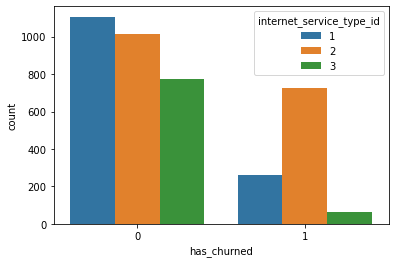

In [310]:
churn_counts_by_internet_service = sns.countplot(x='has_churned', data=train, hue = "internet_service_type_id")

## Conclusions and Key Takeaways

Based on our hypothesis testing, we conclude the following variables warrant further exploration for correlation with churn: 
 - `contract_type_id` 
 - `monthly_charges`
 - `tenure`
 - `payment_type_id`

The variable `internet_service_type_id` does not warrant furhter exploration for correlation with churn.
 

## Split data into X_train and y_train

We will split our data into `X_train` and `y_train` so that we can run the data in our models.

In [350]:
X_train, y_train = train.drop(columns='has_churned'), train.has_churned
X_validate, y_validate = validate.drop(columns='has_churned'), validate.has_churned
X_test, y_test = test.drop(columns='has_churned'), test.has_churned

## Baseline Accuracy

We will establish a baseline accuracy to compare to the accuracy of our models.

In [351]:
train.has_churned.value_counts()

0    2897
1    1046
Name: has_churned, dtype: int64

The majority of our customers have not churned, so our baseliene assumption is that cutsomers will not churn.

In [352]:
model = DummyClassifier(strategy= 'constant', constant = 0)

In [353]:
model.fit(X_train, y_train)

DummyClassifier(constant=0, strategy='constant')

In [354]:
accuracy = round(model.score(X_train, y_train), 2)
print(f'Training accuracy: {accuracy}')

Training accuracy: 0.73


We will now compare the baseline accuracy to the accuracy of different models.

## Decision Tree

We will start with a Decision Tree of max depth 3.

In [377]:
clf1 = DecisionTreeClassifier(max_depth=3, random_state=123)

Fit the data.

In [378]:
clf1 = clf1.fit(X_train, y_train)

In [379]:
clf1

DecisionTreeClassifier(max_depth=3, random_state=123)

Print a decision tree.

In [381]:
dot_data = export_graphviz(clf1, feature_names= X_train.columns, rounded=True, filled=True, out_file=None)
graph = graphviz.Source(dot_data) 

graph.render('telco_tree_1', view=True)

'telco_tree_1.pdf'

The tree indicates to us that the main predictor of churn is contract type. Customers with contract type ID 1 are more likely to churn than customers with contract type ID 2 and 3.

Of customers who have contract type iD one, the biggest predictor of churn is monthly charges less than 64.43.

3 is a year contract, 2 is yearly, 1 is month to month

### Probability of churn

In [382]:
y_pred = clf1.predict(X_train)

In [383]:
y_pred_proba = clf1.predict_proba(X_train)

In [384]:
y_probability = pd.DataFrame(y_pred_proba)
y_probability.head()

,0,1
0,0.983914,0.016086
1,0.808442,0.191558
2,0.254808,0.745192
3,0.793834,0.206166
4,0.808442,0.191558


### Evaluate in-sample results

#### Accuracy score

In [385]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf1.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.79


#### Confusion Matrix

In [386]:
confusion_matrix(y_train, y_pred)

array([[2791,  106],
       [ 736,  310]])

In [387]:
labels1 = ['no_churn_actual', 'churn_actual']
labels2 = ['no_churn_predicted', 'churn_predicted']

pd.DataFrame(confusion_matrix(y_train, y_pred), index = labels1, columns = labels2)

,no_churn_predicted,churn_predicted
no_churn_actual,2791,106
churn_actual,736,310


### Classification Report

In [388]:
classification_report_churn = pd.DataFrame(classification_report(y_train, y_pred, output_dict = True)).T

In [389]:
classification_report_churn

,precision,recall,f1-score,support
0,0.791324,0.963410,0.868929,2897.000000
1,0.745192,0.296367,0.424077,1046.000000
accuracy,0.786457,0.786457,0.786457,0.786457
macro avg,0.768258,0.629889,0.646503,3943.000000
weighted avg,0.779086,0.786457,0.750918,3943.000000


This model beats our baseline accuracy of `0.73`. Let's see what happens when we differ the max depth of our decision tree.

In [390]:
clf2 = DecisionTreeClassifier(max_depth=4, random_state=123)

In [391]:
clf2 = clf2.fit(X_train, y_train)

In [392]:
dot_data = export_graphviz(clf2, feature_names= X_train.columns, rounded=True, filled=True, out_file=None)
graph = graphviz.Source(dot_data) 

graph.render('telco_tree_2', view=True)

'telco_tree_2.pdf'

In [393]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf2.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.79


In [394]:
y_pred_2 = clf2.predict(X_train)

In [395]:
classification_report_churn = pd.DataFrame(classification_report(y_train, y_pred_2, output_dict = True)).T

In [396]:
classification_report_churn

,precision,recall,f1-score,support
0,0.812954,0.927166,0.866312,2897.000000
1,0.669797,0.409178,0.508012,1046.000000
accuracy,0.789754,0.789754,0.789754,0.789754
macro avg,0.741375,0.668172,0.687162,3943.000000
weighted avg,0.774977,0.789754,0.771262,3943.000000


Using a max depth of four increases our accuracy, but decreaes our precision and recall. Let's look at max depth 5.

In [402]:
clf3 = DecisionTreeClassifier(max_depth=5, random_state=123)
clf3 = clf3.fit(X_train, y_train)
dot_data = export_graphviz(clf3, feature_names= X_train.columns, rounded=True, filled=True, out_file=None)
graph = graphviz.Source(dot_data) 

graph.render('telco_tree_3', view=True)

'telco_tree_3.pdf'

In [403]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf3.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.79


In [404]:
y_pred_3 = clf3.predict(X_train)

In [405]:
classification_report_churn = pd.DataFrame(classification_report(y_train, y_pred_3, output_dict = True)).T

In [406]:
classification_report_churn

,precision,recall,f1-score,support
0,0.843915,0.880911,0.862017,2897.000000
1,0.624592,0.548757,0.584224,1046.000000
accuracy,0.792797,0.792797,0.792797,0.792797
macro avg,0.734254,0.714834,0.723120,3943.000000
weighted avg,0.785733,0.792797,0.788324,3943.000000


Precision increases, recall decreases using max depth 5.

## Random forest

In [407]:
from sklearn.ensemble import RandomForestClassifier

In [408]:
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=1,
                            n_estimators=100,
                            max_depth=10, 
                            random_state=123)

### Fit the model

In [409]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=123)

### Feature importance

In [410]:
feature_importances = pd.DataFrame(rf.feature_importances_, index = X_train.columns, columns = [ "relative importance"])

In [411]:
feature_importances = feature_importances.sort_values(by = ['relative importance'], ascending = False)

In [412]:
feature_importances.columns.names = ['category']

In [413]:
feature_importances

category,relative importance
total_charges,0.186758
tenure,0.165272
monthly_charges,0.141848
contract_type_id,0.136580
payment_type_id,0.065013
internet_service_type_id,0.040443
tech_support_Yes,0.030075
online_security_Yes,0.026527
senior_citizen,0.019619
gender_Male,0.018648


In [414]:
most_important_features = feature_importances.head(3)

In [67]:
print(most_important_features.to_markdown())

|                  |   relative importance |
|:-----------------|----------------------:|
| tenure           |              0.24197  |
| monthly_charges  |              0.156533 |
| contract_type_id |              0.148934 |


The above chart indicates to us that the most important values for predicting churn are: **tenure**, **monthly charges**, **contract type**, and **payment type**.

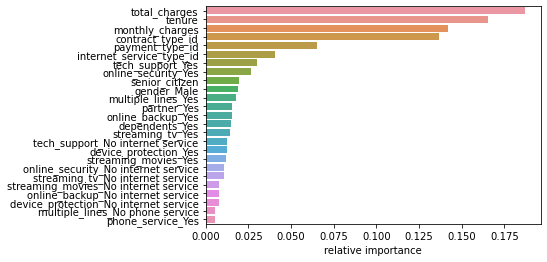

In [415]:
relative_importances = sns.barplot(x=feature_importances['relative importance'], y=feature_importances.index)

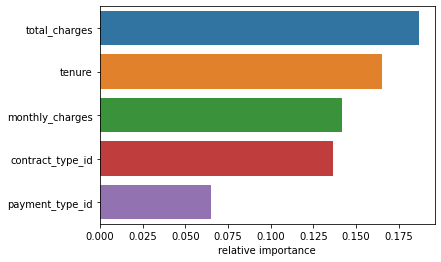

In [416]:
relative_importances = sns.barplot(x=feature_importances['relative importance'][0:5], y=feature_importances.index[0:5])

### Make predictions

In [417]:
y_pred = rf.predict(X_train)

In [418]:
pd.DataFrame(y_pred)

,0
0,0
1,0
2,1
3,0
4,0
...,...
3938,1
3939,0
3940,0
3941,0


### Estimate probability

In [419]:
y_pred_proba = rf.predict_proba(X_train)

In [420]:
pd.DataFrame(y_pred_proba)

,0,1
0,0.998775,0.001225
1,0.829788,0.170212
2,0.436425,0.563575
3,0.901423,0.098577
4,0.894566,0.105434
...,...,...
3938,0.488514,0.511486
3939,0.984183,0.015817
3940,0.607466,0.392534
3941,0.806814,0.193186


#### Accuracy

In [421]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.90


#### Confusion matrix

In [422]:
labels1 = ['did not churn actual', 'churned actual']
labels2 = ['did not churn predicted', 'churned predicted']
df_confusion_matrix = pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels1, columns=labels2)

In [423]:
df_confusion_matrix

,did not churn predicted,churned predicted
did not churn actual,2774,123
churned actual,286,760


#### Classification Report

In [424]:
classification_report_2 = classification_report(y_train, y_pred, output_dict = True)

In [425]:
df_classification_report_2 = pd.DataFrame(classification_report_2).T

In [426]:
df_classification_report_2

,precision,recall,f1-score,support
0,0.906536,0.957542,0.931341,2897.000000
1,0.860702,0.726577,0.787973,1046.000000
accuracy,0.896272,0.896272,0.896272,0.896272
macro avg,0.883619,0.842060,0.859657,3943.000000
weighted avg,0.894377,0.896272,0.893309,3943.000000
